# Phishing Website Detection by Machine Learning Techniques

### Objective :-

##### Build a model that predicts/classifies whether a website is a Phishing website.

In [13]:
#importing neccssary librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("Phishing Data .csv")

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


# Exploratory Data Analysis (EDA):

In [5]:
df.shape

(2456, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2456 entries, 0 to 2455
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            2456 non-null   int64
 1   URL_Length                   2456 non-null   int64
 2   Shortining_Service           2456 non-null   int64
 3   having_At_Symbol             2456 non-null   int64
 4   double_slash_redirecting     2456 non-null   int64
 5   Prefix_Suffix                2456 non-null   int64
 6   having_Sub_Domain            2456 non-null   int64
 7   SSLfinal_State               2456 non-null   int64
 8   Domain_registeration_length  2456 non-null   int64
 9   Favicon                      2456 non-null   int64
 10  port                         2456 non-null   int64
 11  HTTPS_token                  2456 non-null   int64
 12  Request_URL                  2456 non-null   int64
 13  URL_of_Anchor                2456 non-null   int

In [7]:
df.dtypes

having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token                    int64
Request_URL                    int64
URL_of_Anchor                  int64
Links_in_tags                  int64
SFH                            int64
Submitting_to_email            int64
Abnormal_URL                   int64
Redirect                       int64
on_mouseover                   int64
RightClick                     int64
popUpWidnow                    int64
Iframe                         int64
age_of_domain                  int64
DNSRecord                      int64
web_traffic                    int64
Page_Rank                      int64
G

In [8]:
df.columns

Index(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length',
       'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL',
       'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe',
       'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank',
       'Google_Index', 'Links_pointing_to_page', 'Statistical_report',
       'Result'],
      dtype='object')

In [9]:
#checking for NULL values
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [10]:
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  3
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    3
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            2
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  3
DNSRecord                      2
web_traffic                    3
Page_Rank                      3
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

# Statistical summary

In [11]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,...,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000,2456.000000
mean,0.113192,-0.649837,0.122964,0.054560,0.125407,-0.254886,-0.185668,0.255700,0.018730,0.189739,...,0.196254,0.092020,-0.003257,0.536645,0.304560,-0.540717,0.139658,0.344463,0.179153,0.445440
std,0.316892,0.752690,0.328463,0.227166,0.331247,0.676170,0.802068,0.912332,0.798455,0.392175,...,0.397244,0.289112,0.939726,0.498757,0.834146,0.757832,0.346702,0.568911,0.383559,0.497115
min,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


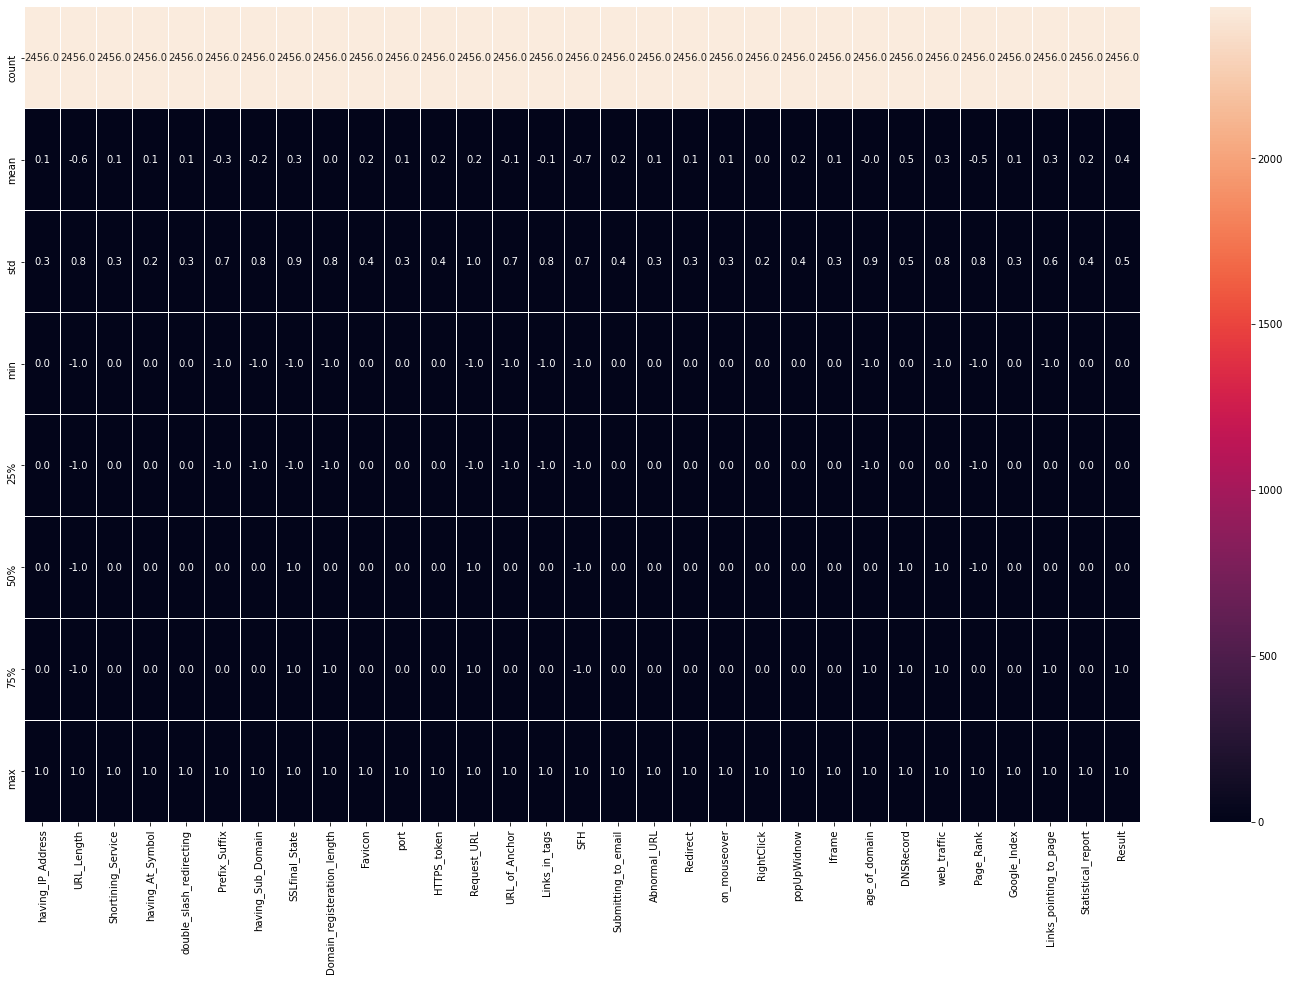

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

# Analyzing Target Variable:

In [17]:
df['Result'].unique()

array([1, 0], dtype=int64)

In [18]:
df['Result'].value_counts()

0    1362
1    1094
Name: Result, dtype: int64

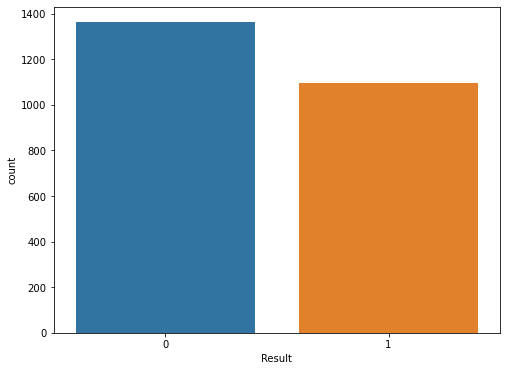

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['Result'])
plt.show()

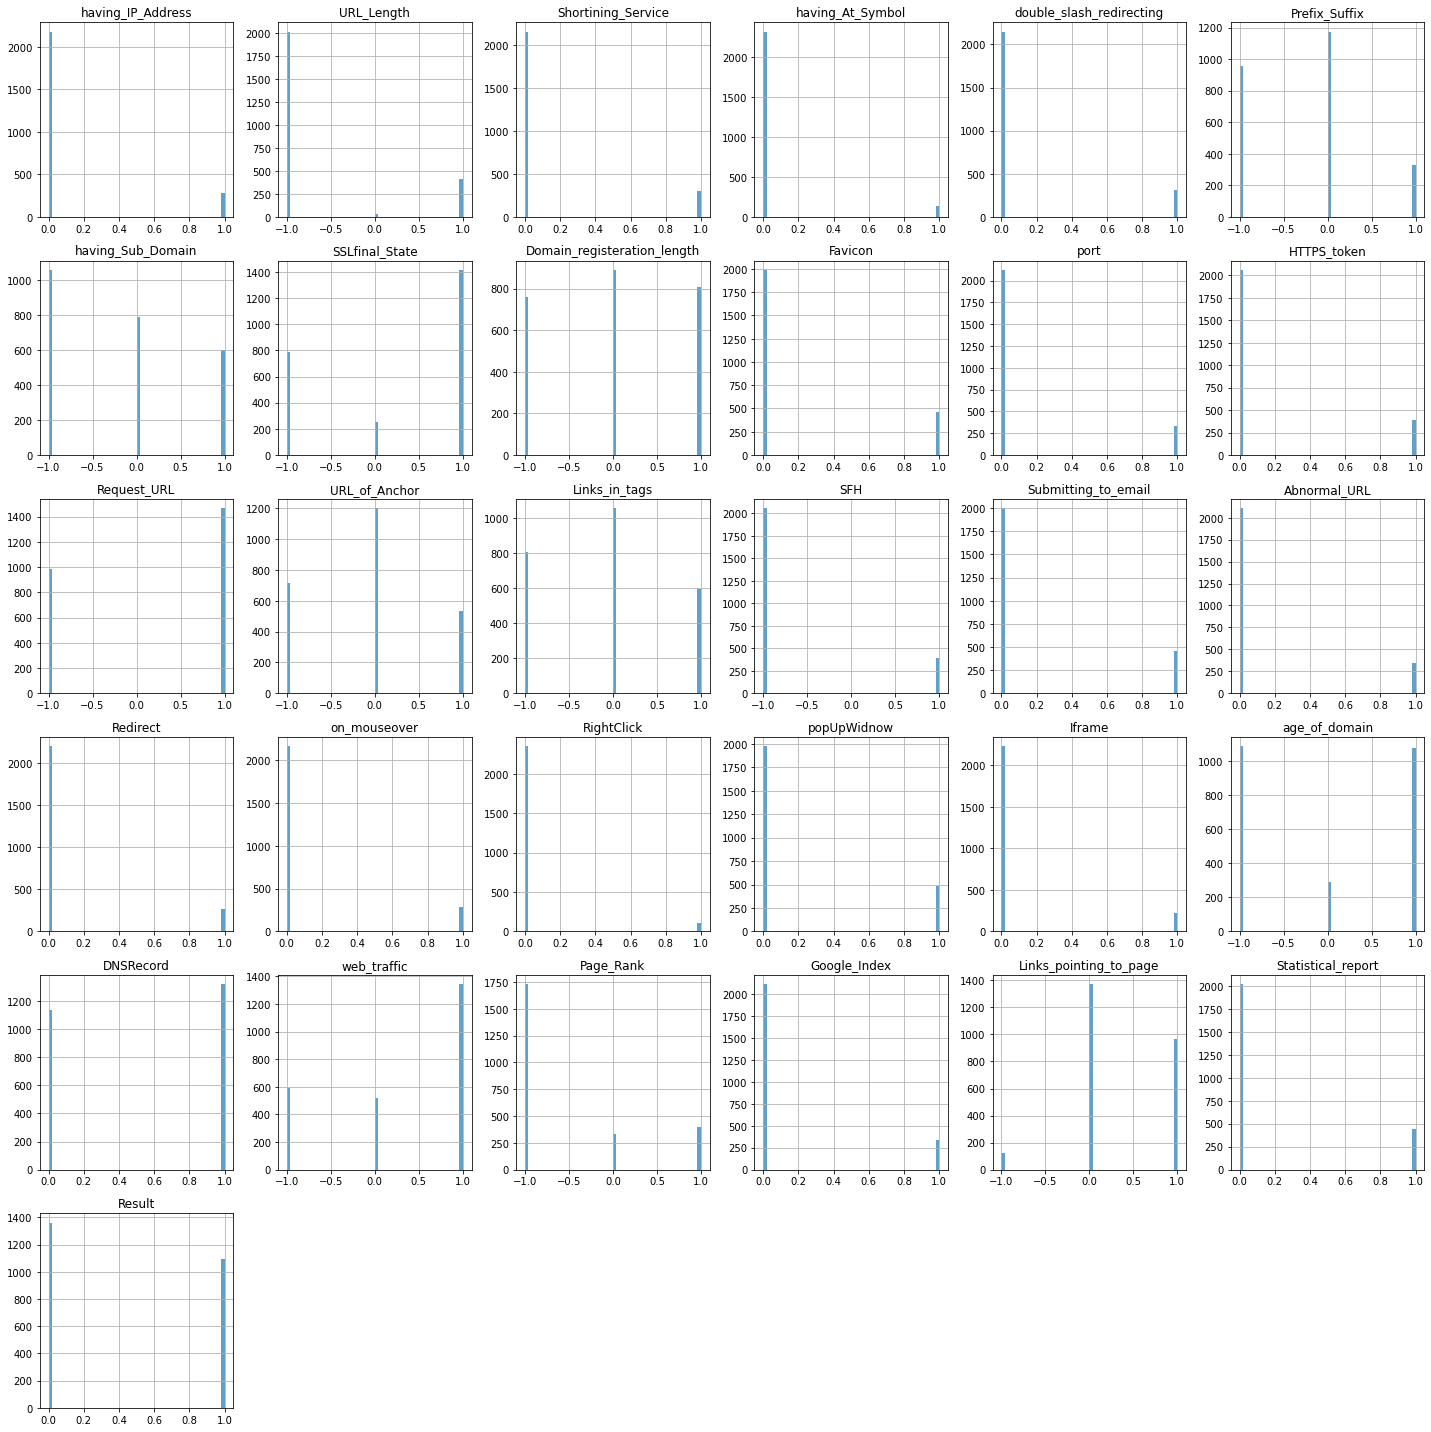

In [30]:
fig, ax = plt.subplots(figsize = (20,20))
df.hist(ax=ax, bins = 50, layout=(6, 6), alpha=0.7, stacked=True)
plt.tight_layout()
plt.show()

# Correlation:

In [31]:
df.corr()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
having_IP_Address,1.000000,0.103582,0.946315,-0.085825,0.920203,0.108087,0.018615,0.043557,-0.098534,0.030326,...,0.049965,0.028537,0.050481,0.228888,0.106839,-0.016420,-0.047548,0.244556,0.215134,-0.061623
URL_Length,0.103582,1.000000,0.119039,0.069272,0.101536,0.068191,-0.012365,0.041580,-0.326758,0.045295,...,0.053432,0.012847,0.014283,0.051523,0.024704,0.000726,-0.026701,-0.007836,0.084554,-0.055605
Shortining_Service,0.946315,0.119039,1.000000,-0.068114,0.876519,0.111831,0.027941,0.052711,-0.089549,0.014858,...,0.045988,0.018059,0.056724,0.241016,0.095182,-0.027334,-0.043555,0.213561,0.219520,-0.061175
having_At_Symbol,-0.085825,0.069272,-0.068114,1.000000,-0.090966,0.026929,0.001966,-0.004449,-0.001145,-0.116249,...,-0.118706,-0.076476,0.035179,-0.107532,-0.066232,0.038937,-0.029553,-0.088749,-0.102878,0.008336
double_slash_redirecting,0.920203,0.101536,0.876519,-0.090966,1.000000,0.106398,0.020216,0.031330,-0.092049,0.048790,...,0.066721,0.015559,0.037953,0.233517,0.112327,-0.015349,-0.046161,0.202975,0.207816,-0.042536
Prefix_Suffix,0.108087,0.068191,0.111831,0.026929,0.106398,1.000000,0.115494,0.372453,-0.139030,-0.020312,...,-0.010835,0.011677,0.178187,-0.070127,0.241684,0.219008,-0.164327,0.069498,0.012800,-0.537020
having_Sub_Domain,0.018615,-0.012365,0.027941,0.001966,0.020216,0.115494,1.000000,0.259734,-0.049267,-0.017455,...,0.007021,-0.031687,0.338584,-0.061389,0.080901,0.097460,-0.051731,-0.022250,-0.018942,-0.266514
SSLfinal_State,0.043557,0.041580,0.052711,-0.004449,0.031330,0.372453,0.259734,1.000000,-0.219062,0.005514,...,0.003094,-0.002762,0.365856,-0.137868,0.408251,0.277823,-0.137412,-0.012810,-0.023872,-0.712876
Domain_registeration_length,-0.098534,-0.326758,-0.089549,-0.001145,-0.092049,-0.139030,-0.049267,-0.219062,1.000000,-0.065988,...,-0.070668,-0.021585,-0.126950,0.033052,-0.201828,-0.039803,0.071476,0.105951,-0.026921,0.260157
Favicon,0.030326,0.045295,0.014858,-0.116249,0.048790,-0.020312,-0.017455,0.005514,-0.065988,1.000000,...,0.942697,0.643493,0.008309,0.164356,0.079784,-0.032929,-0.024208,0.130500,0.656712,0.005067


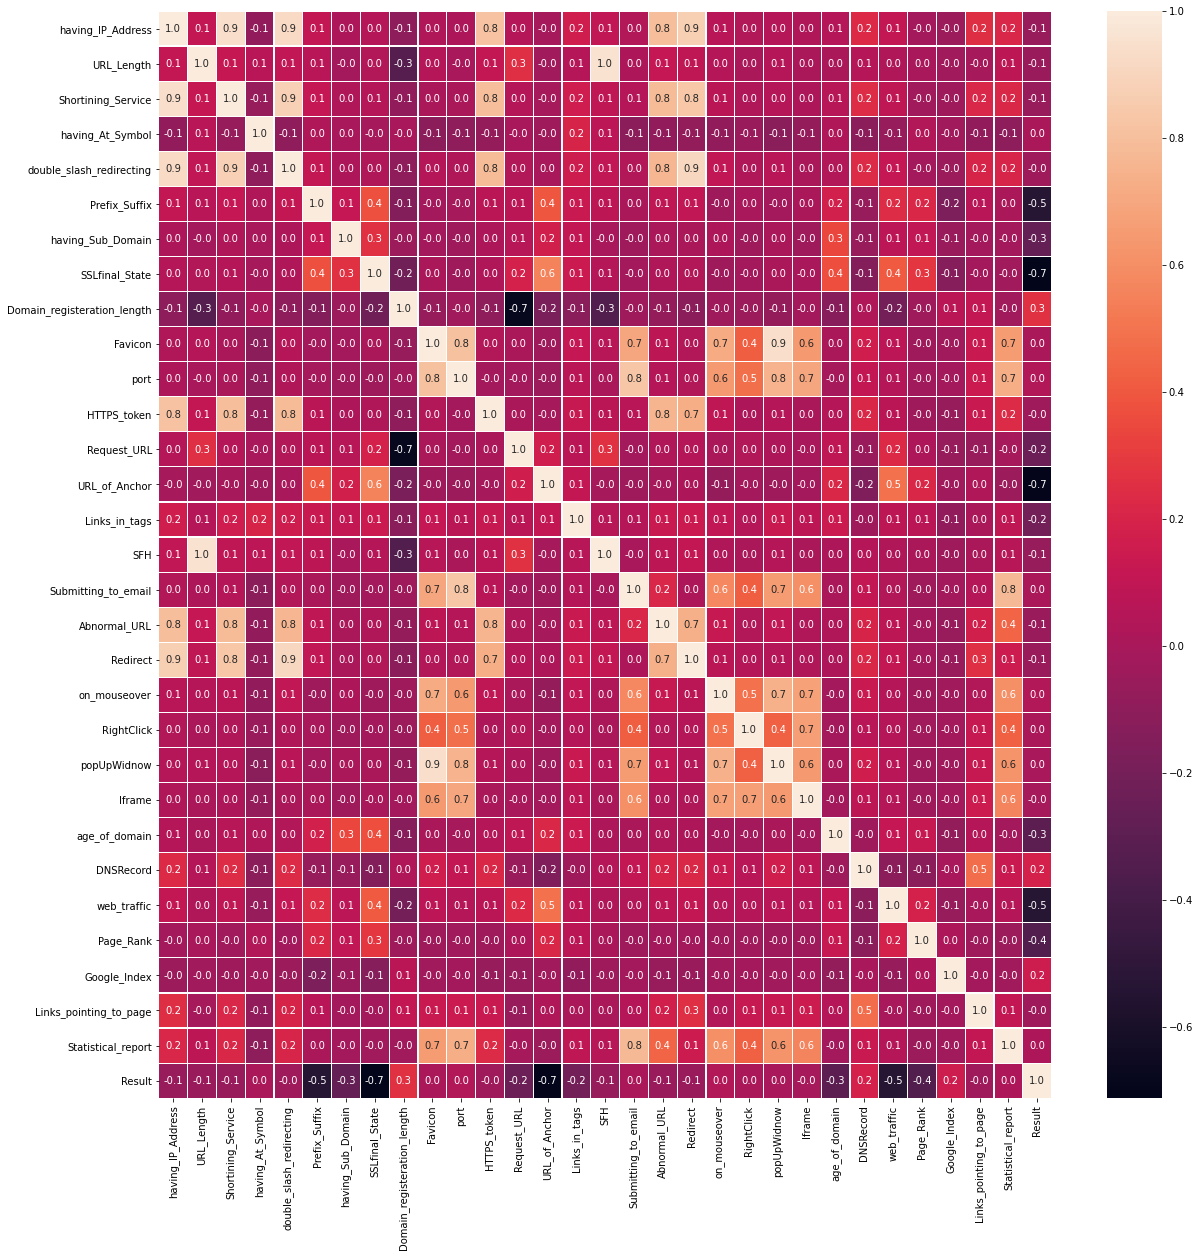

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),linewidths=0.1,fmt='0.1f',annot=True)
plt.show()

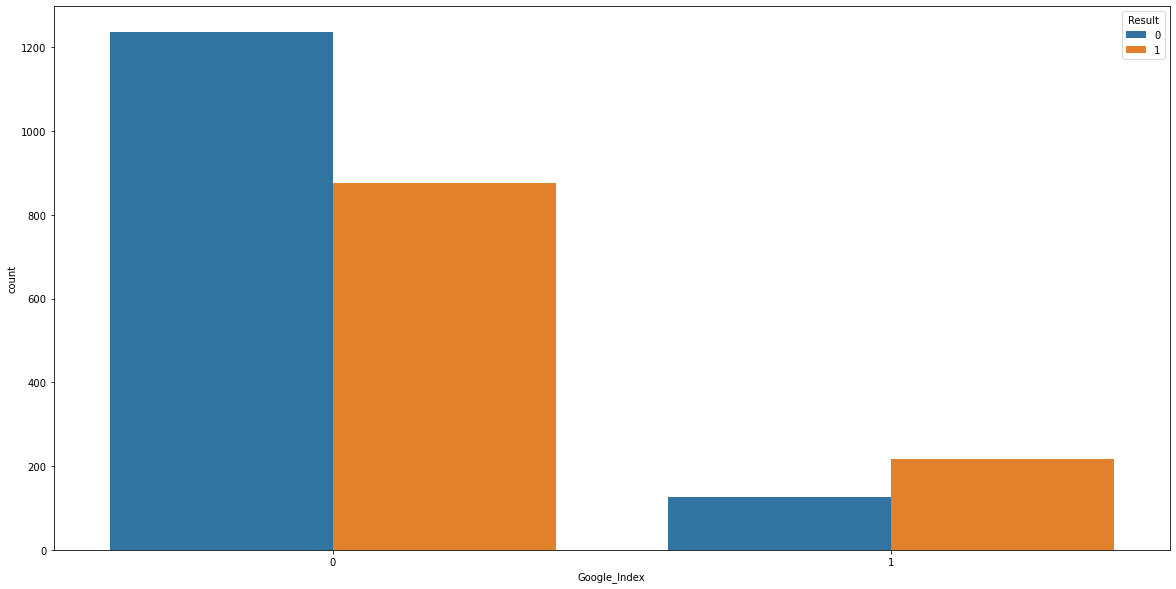

In [33]:
plt.figure(figsize=(20,10))
sns.countplot(x='Google_Index',hue='Result' ,data=df)
plt.show()

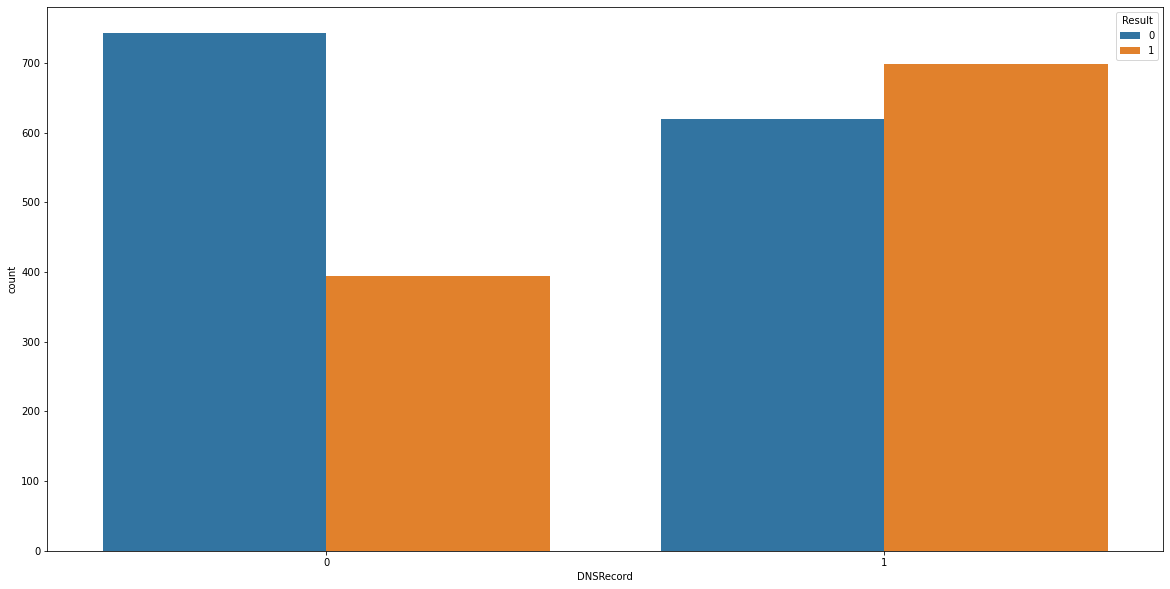

In [34]:
plt.figure(figsize=(20,10))
sns.countplot(x='DNSRecord',hue='Result' ,data=df)
plt.show()

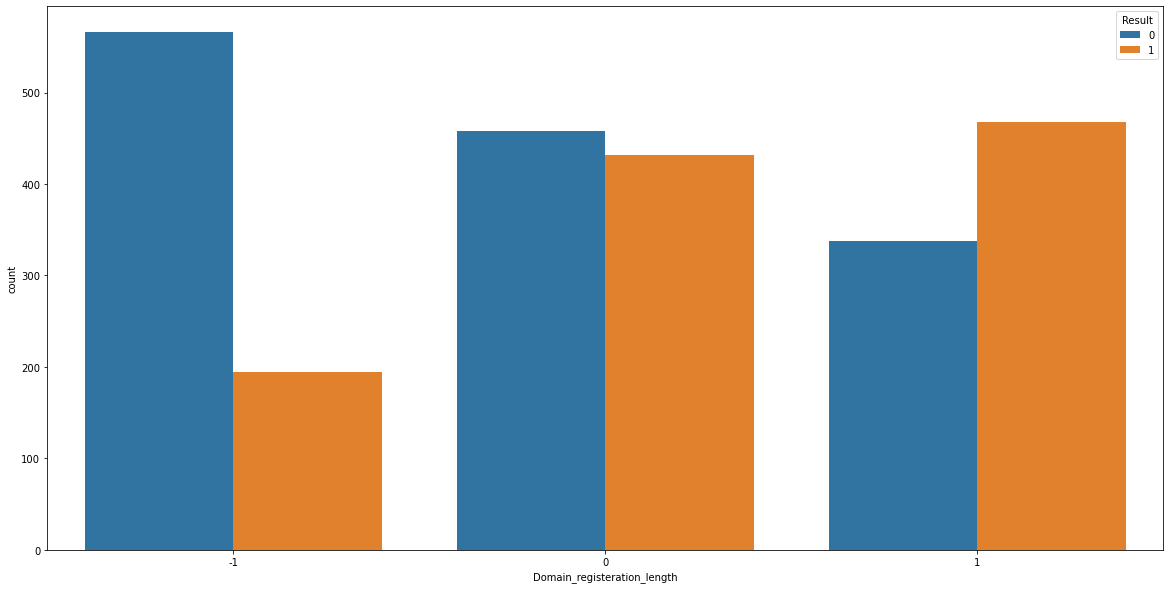

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x='Domain_registeration_length',hue='Result' ,data=df)
plt.show()

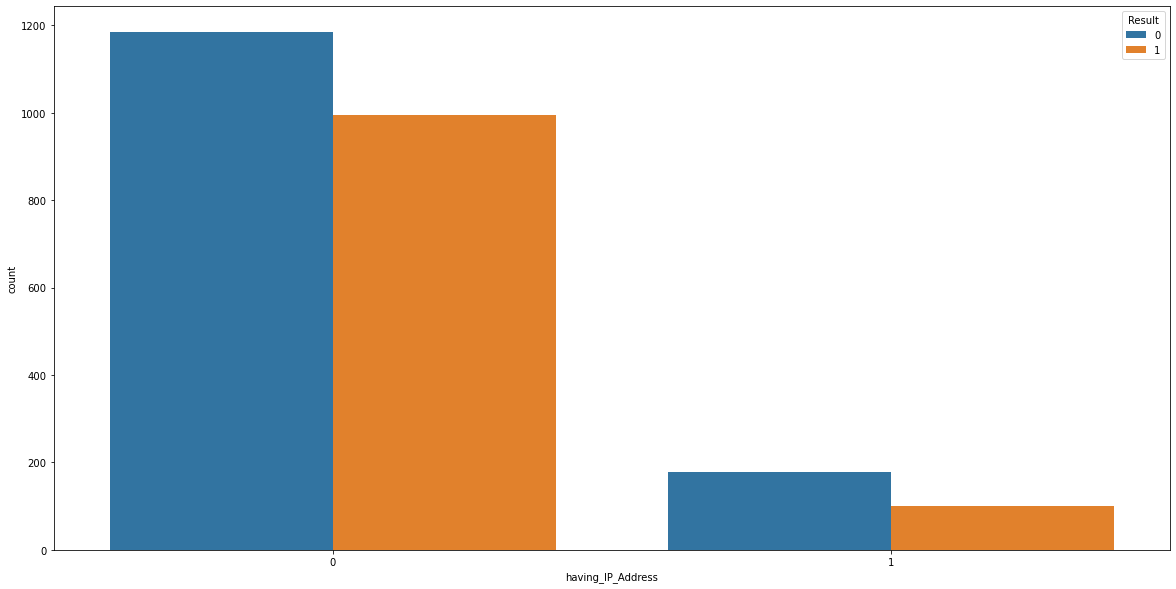

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='having_IP_Address',hue='Result' ,data=df)
plt.show()

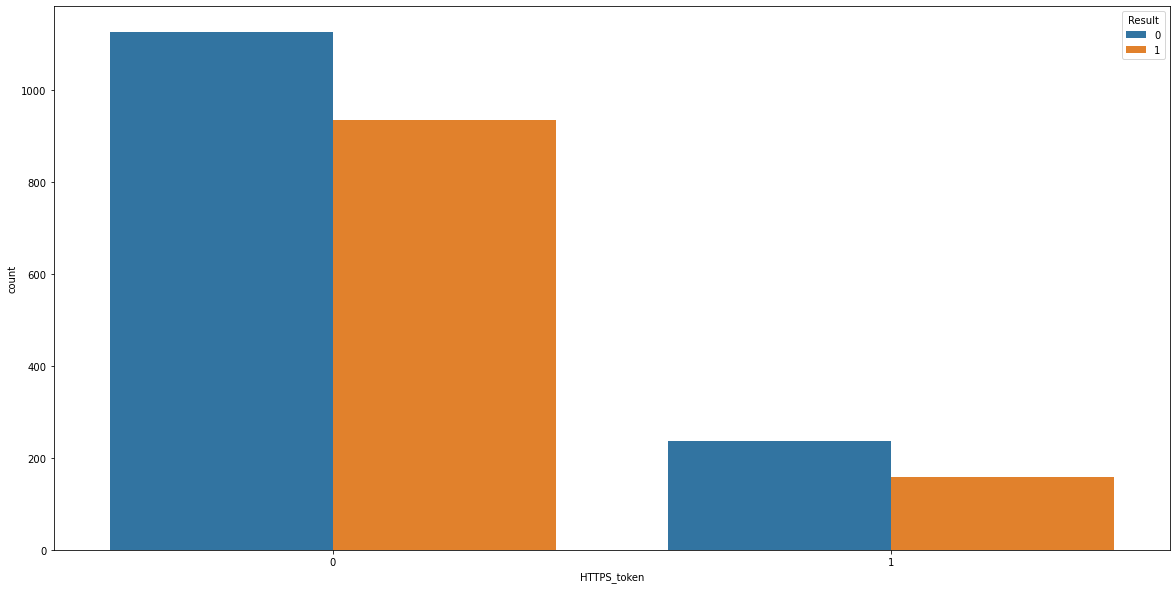

In [37]:
plt.figure(figsize=(20,10))
sns.countplot(x='HTTPS_token',hue='Result' ,data=df)
plt.show()

# Checking for Outliers:

In [38]:
X = df.drop(columns = ['Result'])
y = df['Result']

In [41]:
from scipy import stats

No outliers found in column: having_IP_Address
No outliers found in column: URL_Length
No outliers found in column: Shortining_Service
Outliers found in column: having_At_Symbol


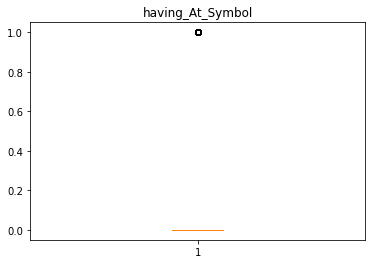

No outliers found in column: double_slash_redirecting
No outliers found in column: Prefix_Suffix
No outliers found in column: having_Sub_Domain
No outliers found in column: SSLfinal_State
No outliers found in column: Domain_registeration_length
No outliers found in column: Favicon
No outliers found in column: port
No outliers found in column: HTTPS_token
No outliers found in column: Request_URL
No outliers found in column: URL_of_Anchor
No outliers found in column: Links_in_tags
No outliers found in column: SFH
No outliers found in column: Submitting_to_email
No outliers found in column: Abnormal_URL
No outliers found in column: Redirect
No outliers found in column: on_mouseover
Outliers found in column: RightClick


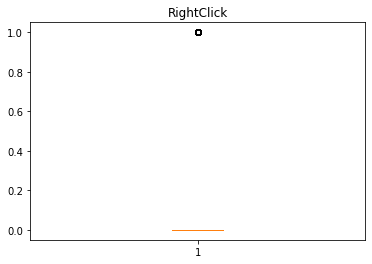

No outliers found in column: popUpWidnow
Outliers found in column: Iframe


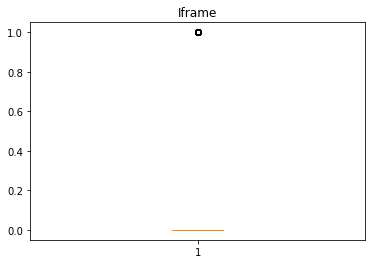

No outliers found in column: age_of_domain
No outliers found in column: DNSRecord
No outliers found in column: web_traffic
No outliers found in column: Page_Rank
No outliers found in column: Google_Index
No outliers found in column: Links_pointing_to_page
No outliers found in column: Statistical_report


In [42]:
# loop through each column
for column in X.columns:
    # calculate z-scores for each value in the column
    z = np.abs(stats.zscore(df[column]))
    # set threshold for z-scores 
    threshold = 3
    # identify the rows that contain outliers
    outliers = np.where(z > threshold)
    # check if outliers are present
    if len(outliers[0]) > 0:
        print("Outliers found in column: " + column)
        # create box plot
        plt.boxplot(X[column])
        plt.title(column)
        plt.show()
    else:
        print("No outliers found in column: " + column)

# Zscore for removing Outliers:

In [43]:
from scipy.stats import zscore

In [44]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,1,0,0,1,-1,-1,-1,0,0,...,0,0,-1,1,-1,-1,0,1,1,1
1,0,1,0,0,0,-1,0,1,0,0,...,0,0,-1,1,0,-1,0,1,0,1
2,0,0,0,0,0,-1,-1,-1,0,0,...,0,0,0,1,1,-1,0,0,1,1
3,0,0,0,0,0,-1,-1,-1,1,0,...,0,0,-1,1,1,-1,0,-1,0,1
4,0,0,1,0,0,-1,1,1,0,0,...,1,0,-1,1,0,-1,0,1,0,0


In [45]:
df1=  X[['having_At_Symbol','RightClick','Iframe']].copy()

In [46]:
Z = zscore(df1)

In [47]:
z_abs_score = np.abs(Z)

In [48]:
#taking 3 as thresold value
df2 = df1[(z_abs_score < 3).all(axis=1)]

In [49]:
df2.shape

(2096, 3)

In [50]:
df1.shape

(2456, 3)

In [51]:
dropindx = X.index.difference(df2.index)

In [52]:
df.drop(dropindx,inplace = True) #dropping the outlier Dataframe

In [53]:
df.shape

(2096, 31)

# Checking For Skewness:

In [55]:
df.skew()

having_IP_Address              2.379370
URL_Length                     1.791326
Shortining_Service             2.243269
having_At_Symbol               0.000000
double_slash_redirecting       2.180058
Prefix_Suffix                  0.366000
having_Sub_Domain              0.333069
SSLfinal_State                -0.530925
Domain_registeration_length   -0.044665
Favicon                        2.393766
port                           3.600632
HTTPS_token                    1.787065
Request_URL                   -0.401239
URL_of_Anchor                  0.086897
Links_in_tags                  0.240891
SFH                            1.943052
Submitting_to_email            2.393766
Abnormal_URL                   2.006585
Redirect                       2.499048
on_mouseover                   4.060212
RightClick                     0.000000
popUpWidnow                    2.309603
Iframe                         0.000000
age_of_domain                  0.013271
DNSRecord                     -0.147450


# Principle Component Analysis:

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)

In [58]:
component = pca.fit_transform(X)

In [59]:
pca.fit(X)

PCA(n_components=15)

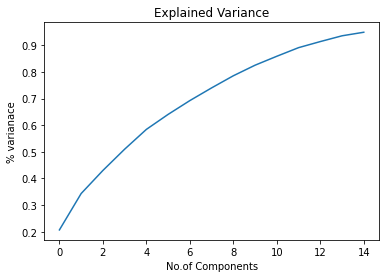

In [60]:
#visualzise
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No.of Components')
plt.ylabel('% varianace')
plt.title('Explained Variance')
plt.show()

In [64]:
final = PCA(n_components=15)
final_data = final.fit_transform(X)
pca_X = pd.DataFrame(final_data)
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.151787,2.440373,0.938363,0.595680,0.751495,1.190755,0.822231,0.306042,0.077098,0.193636,-0.241889,-0.453163,0.022469,0.746108,0.000791
1,0.182182,1.159236,-0.316612,-0.125048,-0.531854,0.237623,-0.958718,-0.647394,0.497073,0.715132,-0.384787,-1.215237,-0.054812,0.279467,0.096036
2,-0.396393,1.249874,-0.428962,0.424158,0.581662,0.087798,-1.155454,0.237444,0.096407,-1.121483,-0.155419,0.425214,0.307206,0.588825,0.693357
3,-1.808144,0.277709,-0.295163,0.665436,-0.939120,0.210024,0.044822,-0.553469,-0.788411,-1.298582,-0.384577,0.365248,0.335444,0.073133,1.247596
4,0.350915,0.544586,0.035156,0.085697,0.499689,0.009905,-0.024220,-1.385196,0.588744,0.779791,-0.170115,-1.350534,-0.108944,0.178077,0.088711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2451,-1.854557,-0.520357,-0.565524,0.209329,-0.954245,-0.213773,-0.019569,-0.510079,0.792545,-0.979950,0.279704,0.905144,-0.709947,-0.293002,-0.279966
2452,-1.652254,-0.844970,0.874665,-0.579655,-0.410781,0.222011,0.568844,0.495661,0.534085,0.624217,0.437312,-0.388473,-0.529150,-0.235666,-0.053846
2453,0.817086,-0.276506,-1.264155,0.416037,-0.167651,0.180271,1.331330,-0.515589,-0.119690,0.018888,-0.100331,-0.293718,-0.633529,0.142995,-0.125225
2454,-1.367237,0.387697,-0.166331,-1.577478,0.574303,-0.014217,-0.527439,1.169863,-0.159530,0.015138,0.255216,0.903529,-0.769666,1.179151,-0.084314


# Model Building:

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV,cross_val_score

# Spliting data

In [66]:
X_train,X_test,y_train,y_test = train_test_split(pca_X,y,test_size=.31,random_state=9)

# LogisticRegression

In [67]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [68]:
lr.score(X_train,y_train)

0.9403778040141676

In [69]:
pred_lr = lr.predict(X_test)

In [70]:
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

0.9396325459317585
[[402  32]
 [ 14 314]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       434
           1       0.91      0.96      0.93       328

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762



# KNeighborsClassifier:

In [72]:
K =  KNeighborsClassifier()
K.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
K.score(X_train,y_train)

0.9521841794569067

In [74]:
pred_k = K.predict(X_test)

In [75]:
print(accuracy_score(y_test,pred_k))
print(confusion_matrix(y_test,pred_k))
print(classification_report(y_test,pred_k))

0.952755905511811
[[411  23]
 [ 13 315]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       434
           1       0.93      0.96      0.95       328

    accuracy                           0.95       762
   macro avg       0.95      0.95      0.95       762
weighted avg       0.95      0.95      0.95       762



# DecisionTreeClassifier:

In [76]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [77]:
DT.score(X_train,y_train)

0.9946871310507674

In [78]:
pred_dt = DT.predict(X_test)

In [79]:
print(accuracy_score(y_test,pred_dt))
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

0.9435695538057742
[[407  27]
 [ 16 312]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       434
           1       0.92      0.95      0.94       328

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      0.94      0.94       762



# RandomForestClassifier:

# rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

In [81]:
rfc.score(X_train,y_train)

0.9946871310507674

In [82]:
pred_rf = rfc.predict(X_test)

In [83]:
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

0.9816272965879265
[[425   9]
 [  5 323]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       434
           1       0.97      0.98      0.98       328

    accuracy                           0.98       762
   macro avg       0.98      0.98      0.98       762
weighted avg       0.98      0.98      0.98       762



# Support Vector Machine:

In [84]:
sv=svm.SVC(kernel = 'rbf', probability = True)
sv.fit(X_train,y_train)

SVC(probability=True)

In [85]:
sv.fit(X_train,y_train)

SVC(probability=True)

In [86]:
pred_sv = sv.predict(X_test)

In [87]:
print(accuracy_score(y_test,pred_sv))
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

0.9619422572178478
[[416  18]
 [ 11 317]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       434
           1       0.95      0.97      0.96       328

    accuracy                           0.96       762
   macro avg       0.96      0.96      0.96       762
weighted avg       0.96      0.96      0.96       762



# Cross Validation:

In [88]:
#logistiregression
print(cross_val_score(lr,pca_X,y,cv=5).mean())

0.9389275247131291


In [89]:
#knn
print(cross_val_score(K,pca_X,y,cv=5).mean())

0.9503261967446559


In [90]:
#DecisionTreeClassifier
print(cross_val_score(DT,pca_X,y,cv=5).mean())

0.9674217210603878


In [91]:
#Randomclassifier
print(cross_val_score(rfc,pca_X,y,cv=5).mean())

0.9780123524249499


In [92]:
#SVM
print(cross_val_score(sv,pca_X,y,cv=5).mean())

0.9613200205321808


# Hyper Parameter Tunning:

### RandomForestClassifier:

In [93]:
parameters = {'max_depth':[6,7,8],'max_features':['auto','sqrt'],'n_estimators':[200,300],'criterion' :['gini','entropy']}

In [94]:
RFC = RandomForestClassifier()

In [95]:
RF_cv = GridSearchCV(RFC, parameters, cv=5)

In [96]:
RF_cv.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300]})

In [97]:
RF_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [98]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train,y_train)
pred_rf = model_RFC.predict(X_test)
acc = accuracy_score(y_test,pred_rf)
print(acc*100)

97.50656167979002


# AUC ROC Curve:

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

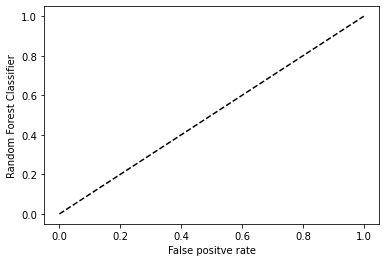

In [100]:
plt.plot([0,1],'k--')
plt.plot(label='Random Forest Classifier')
plt.xlabel('False positve rate')
plt.ylabel('Random Forest Classifier')
plt.show()

In [101]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred_rf = model.predict(X_test)
print(accuracy_score(y_test,pred_rf))

0.9776902887139107


# RandomForestClassifier 97.76%

# Saving model

In [102]:
import joblib

In [103]:
joblib.dump(model,'PhishingWebsites.pkl')

['PhishingWebsites.pkl']